## Auto Regressive for Feature Extraction by Lags of time series
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
eeg_data = pd.read_csv('Subject_1_VR.csv')
eeg_data.head()

,CH 1,CH 2,CH 3,CH 4,CH 6,CH 7,CH 8
0,1.918465e-12,1.520561e-12,1.714184e-13,-3.422151e-12,-6.483702e-14,1.247003e-12,1.392664e-12
1,-4.509159e+00,-6.211227e+00,-5.730144e+00,-6.112785e+00,2.984797e+01,-5.506791e+00,-3.553580e+00
2,3.025560e-01,-7.839167e-02,1.224983e+00,4.012415e+00,4.861158e+01,-8.120446e+00,3.683355e+00
3,-1.714121e-01,-6.277584e+00,-4.990203e+00,5.355046e-01,4.095041e+01,-1.461105e+01,-1.017404e+01
4,-1.554068e+00,-1.385413e+01,-6.776541e+00,-1.139681e+00,2.500130e+01,-2.130122e+01,-2.209927e+01


In [3]:
eeg_data1 = eeg_data['CH 4']

In [4]:
eeg_data1.head()

0   -3.422151e-12
1   -6.112785e+00
2    4.012415e+00
3    5.355046e-01
4   -1.139681e+00
Name: CH 4, dtype: float64

In [5]:
type(eeg_data1)

pandas.core.series.Series

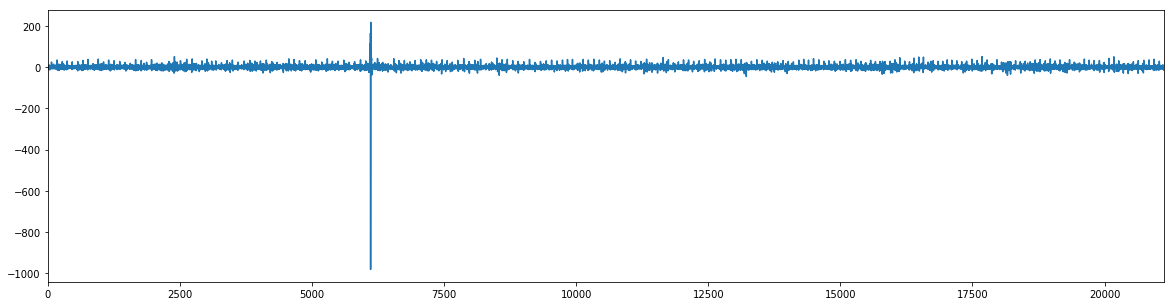

In [6]:
eeg_data1.plot(figsize=(20,5)) ## CSV file data

#### Testing for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
#checking data is stationary or not
adf_check(eeg_data1)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -54.954084039698
p-value : 0.0
#Lags Used : 45
Number of Observations Used : 21075
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [10]:
from statsmodels.graphics.tsaplots import plot_acf

### Auto correlation

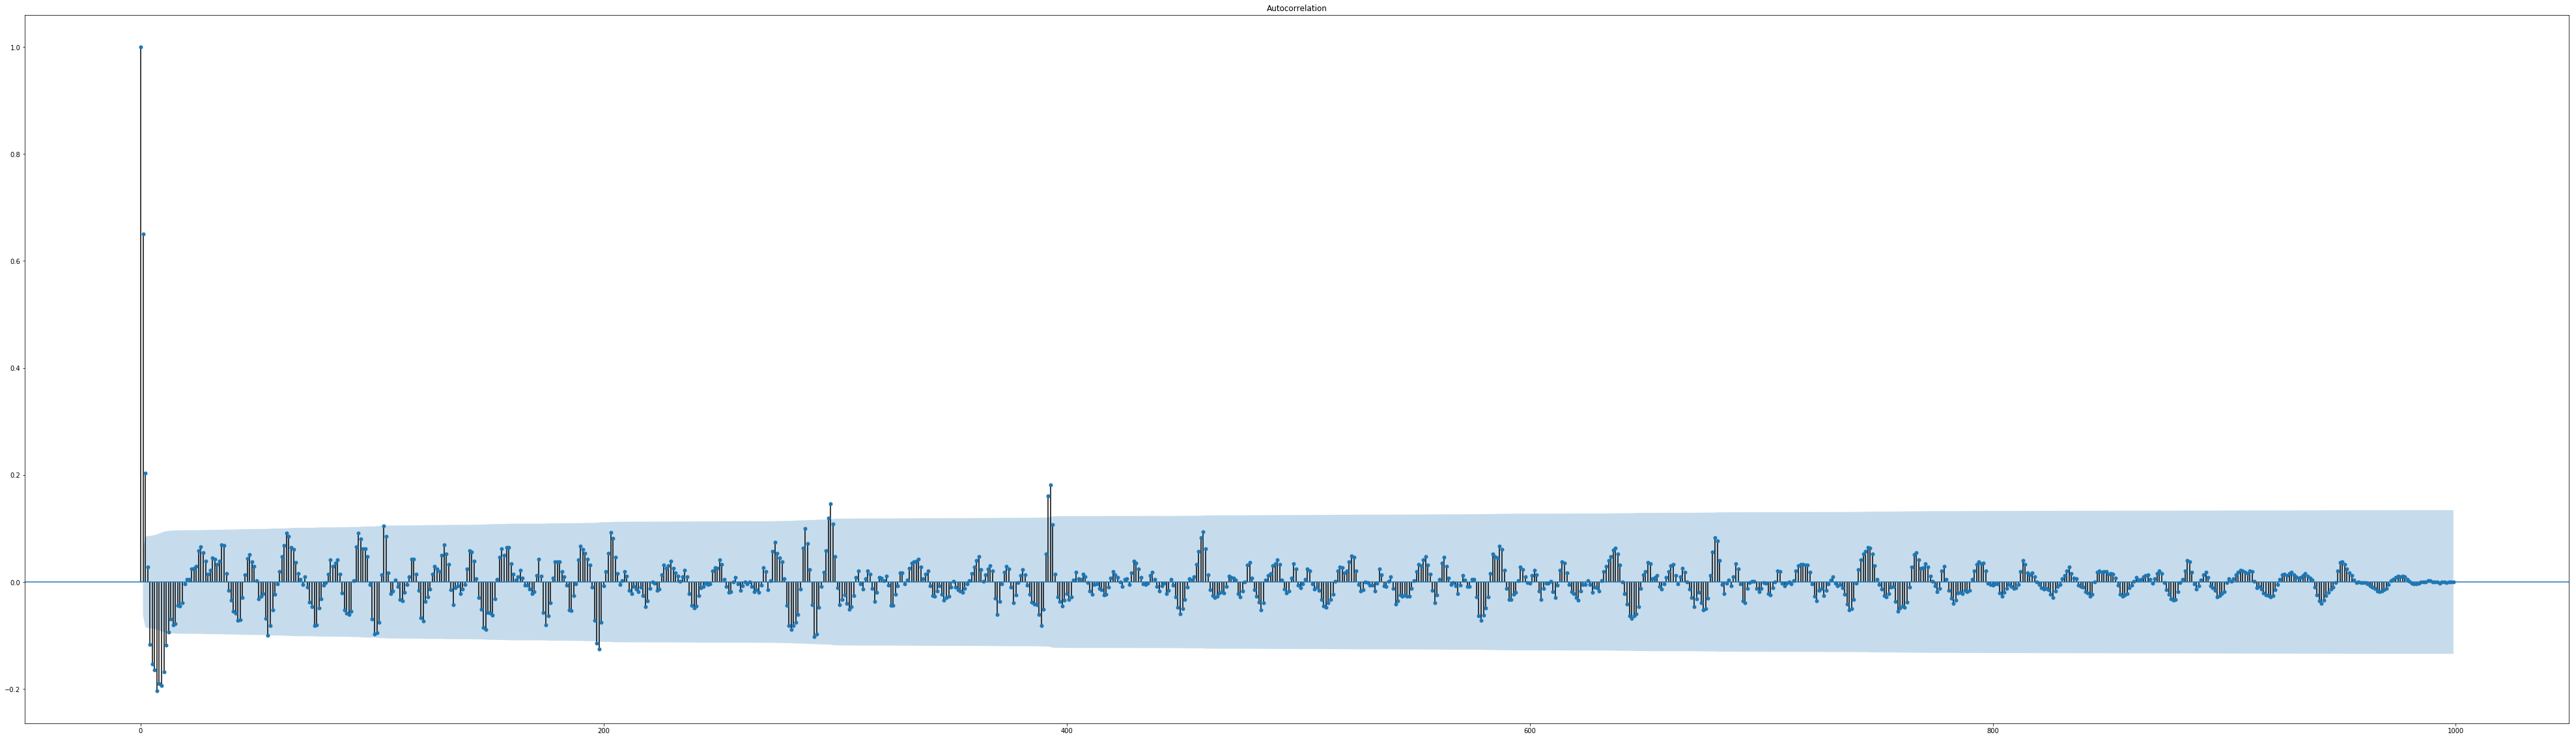

In [11]:
fig, ax = plt.subplots(figsize=(70, 20))
plot_acf(eeg_data1[:1000], ax=ax);

# Lag of time series for 15

In [12]:
#take difference 1
diff = eeg_data1.diff(periods=15)
# integrated of order 1 because here we are taking 1 lag/1 time difference
# it's denoted by d(diff), one of the parameter of ARIMA model

diff.dropna(inplace=True)
diff


15      -10.721607
16       -1.983816
17       -6.825899
18        2.483102
19        7.231288
20       -4.183402
21       -3.051507
22        2.179313
23        0.416599
24        5.689138
25       10.655589
26        7.863208
27        8.195048
28       16.486496
29       21.826078
30       19.632321
31       16.601475
32       11.753524
33        3.014428
34       -6.979855
35      -10.317722
36      -12.007526
37      -18.721750
38      -15.702096
39       -8.507712
40       -3.647093
41        3.439021
42       -4.507603
43      -15.694654
44       -6.931689
           ...    
21091     6.670925
21092    -0.607369
21093    -4.775518
21094     5.919461
21095     2.822466
21096    -6.861331
21097    -2.216470
21098     3.376007
21099     7.233157
21100     5.941041
21101     3.017984
21102    14.923846
21103    20.479042
21104    16.367748
21105    14.951811
21106     1.633306
21107    -2.516644
21108     0.709734
21109   -14.747162
21110   -12.841323
21111    -2.225091
21112    -9.

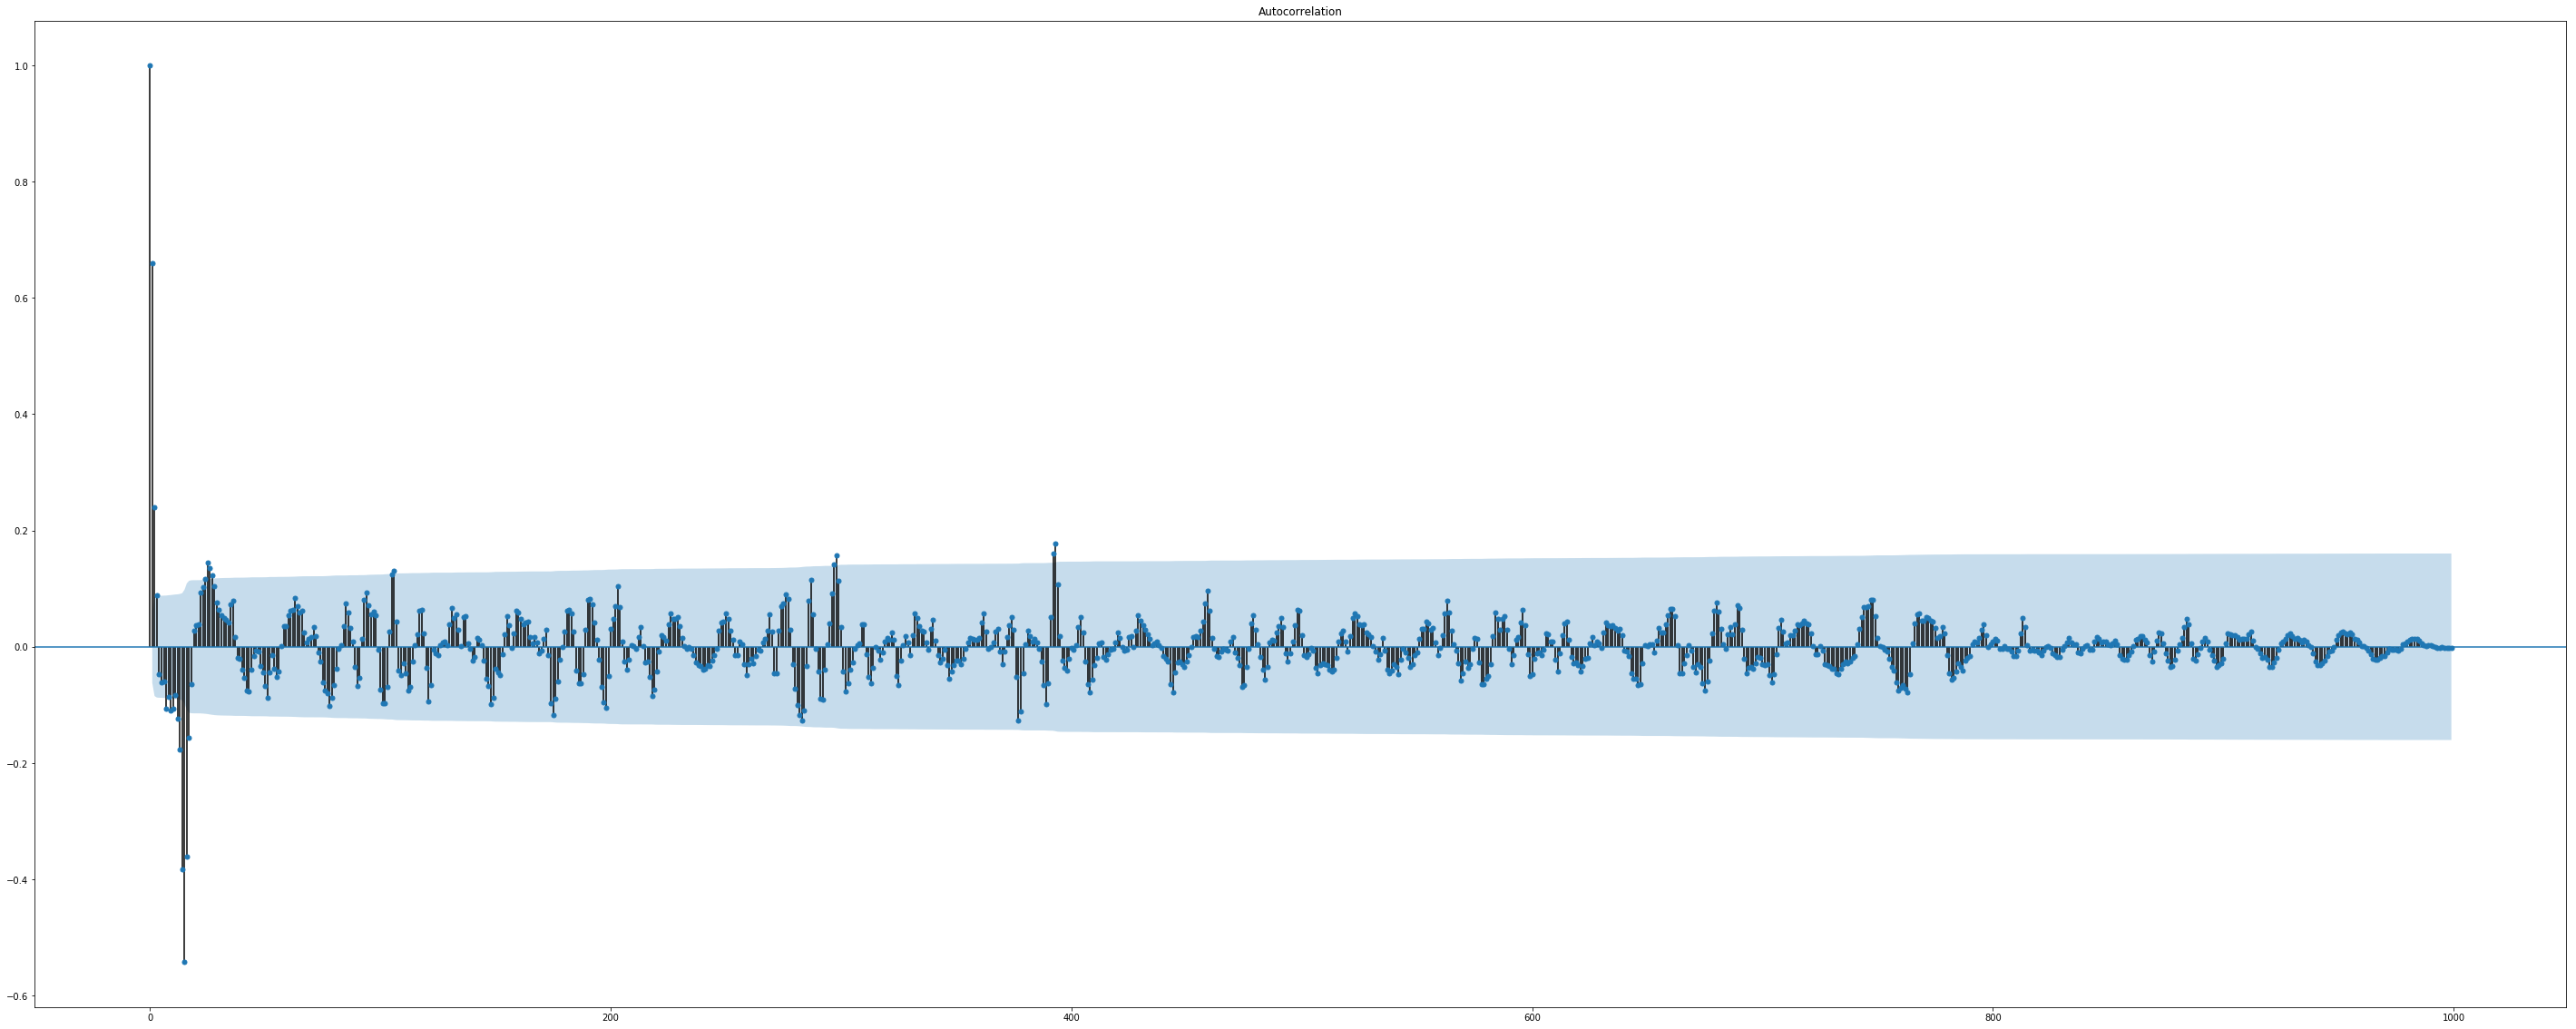

In [13]:
fig, ax = plt.subplots(figsize=(50, 20))
plot_acf(diff[:1000], ax=ax);

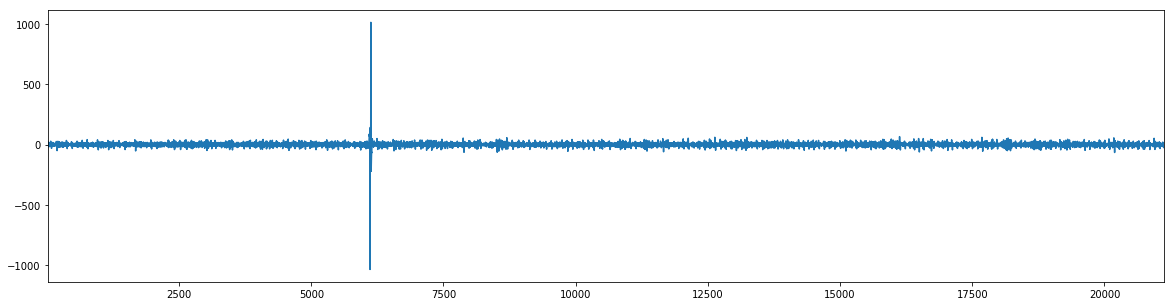

In [14]:
diff.plot(figsize=(20,5))

# Lags of time series from 16 to 20

In [15]:
df = pd.DataFrame(eeg_data1.copy())
df.columns = ["y"]

# Adding the lag of the target variable from 16 steps back up to 20
for i in range(16, 21):
    df["lag_{}".format(i)] = df.y.shift(i)

In [16]:
df.dropna()

,y,lag_16,lag_17,lag_18,lag_19,lag_20
20,2.601681e+00,-1.139681,0.535505,4.012415,-6.112785,-3.422151e-12
21,3.138791e+00,6.785083,-1.139681,0.535505,4.012415,-6.112785e+00
22,7.793041e+00,6.190298,6.785083,-1.139681,0.535505,4.012415e+00
23,2.328020e+00,5.613729,6.190298,6.785083,-1.139681,5.355046e-01
24,-1.170986e+00,1.911421,5.613729,6.190298,6.785083,-1.139681e+00
25,1.168518e-01,-6.860125,1.911421,5.613729,6.190298,6.785083e+00
26,3.508372e-01,-10.538737,-6.860125,1.911421,5.613729,6.190298e+00
27,5.337765e+00,-7.512371,-10.538737,-6.860125,1.911421,5.613729e+00
28,9.995449e+00,-2.857283,-7.512371,-10.538737,-6.860125,1.911421e+00
29,1.050270e+01,-6.491047,-2.857283,-7.512371,-10.538737,-6.860125e+00
